# Simple LIF network

In [4]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime

## Network design

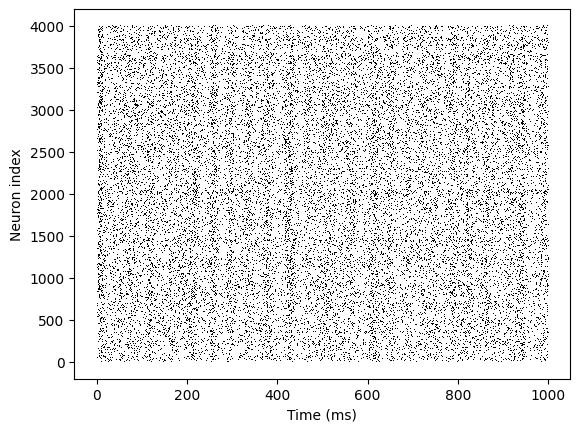

In [9]:
taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = 10*mV
El = 11*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = 0*volt', refractory=5*ms,
                method='exact')
P.v = 'rand() * Vt'
P.ge = 0*mV
P.gi = 0*mV

we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)

st_mon = StateMonitor(P,'v',record=True)
s_mon = SpikeMonitor(P)

run(1 * second)

plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()

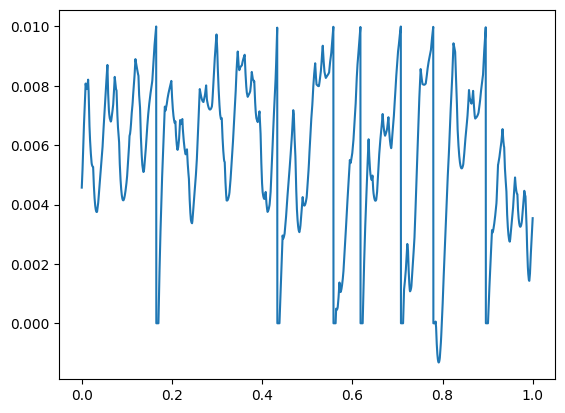

In [10]:
plot(st_mon.t, st_mon.v[0])